In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

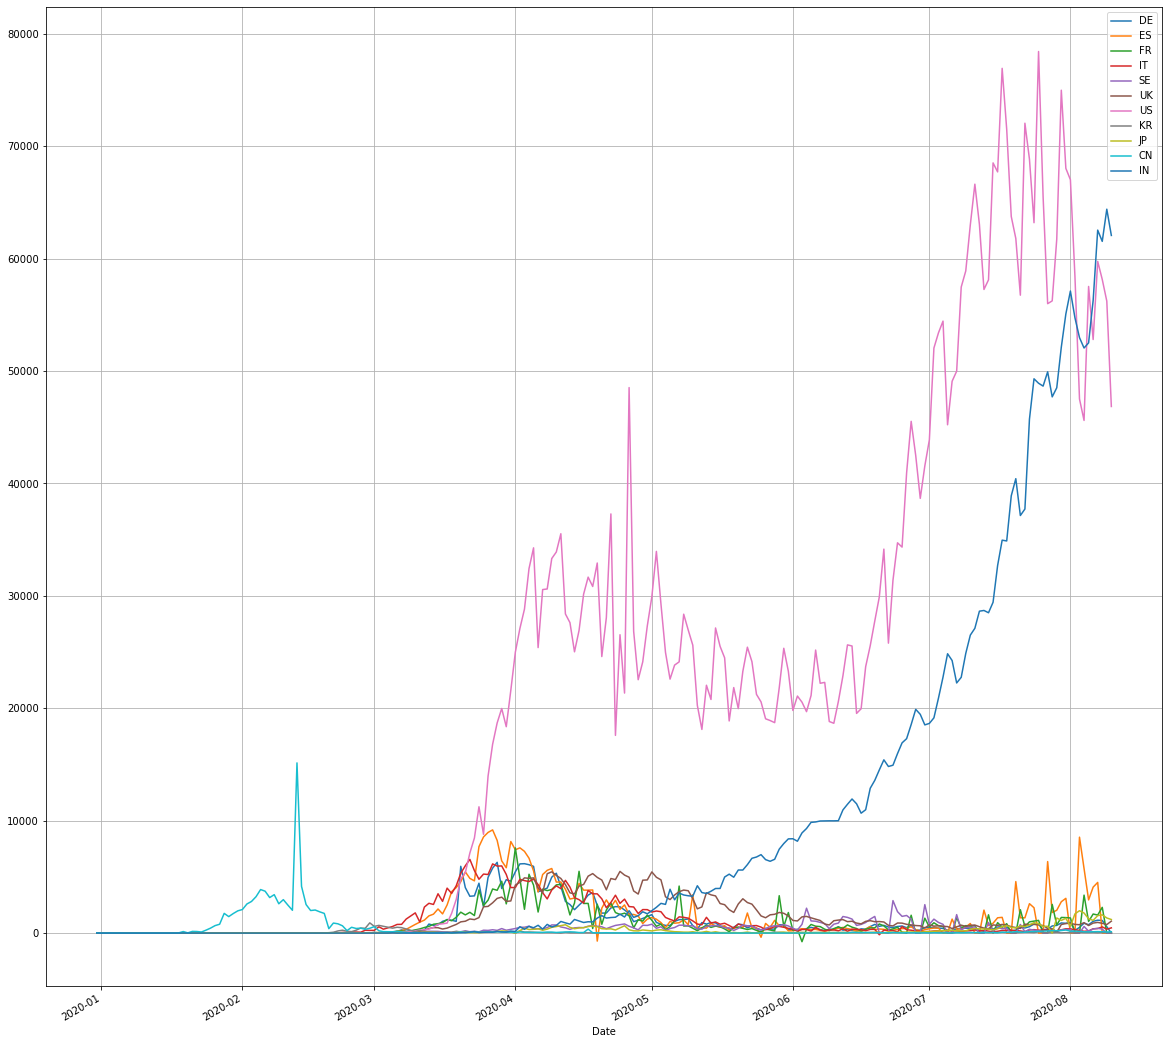

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

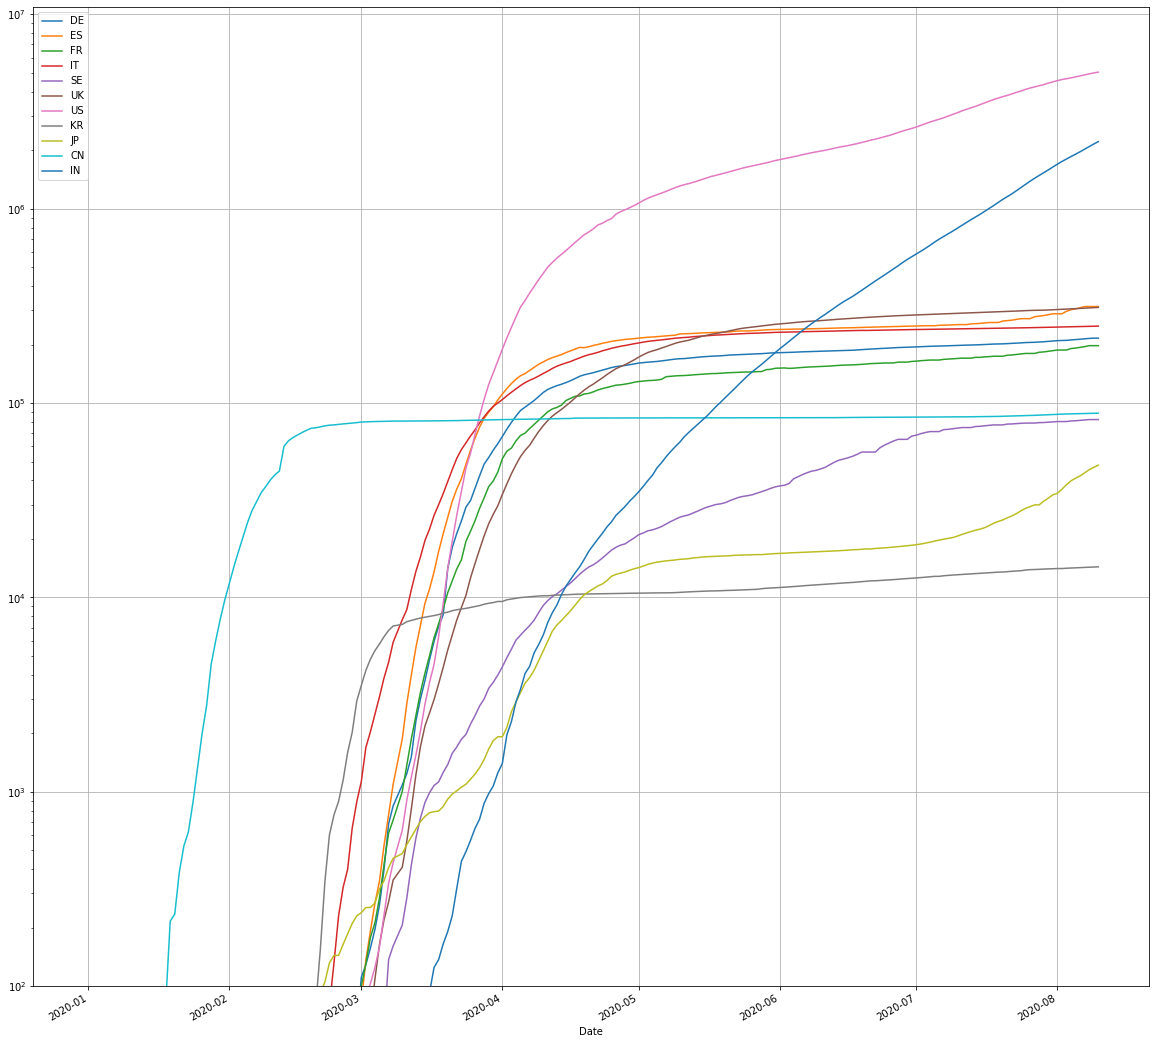

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

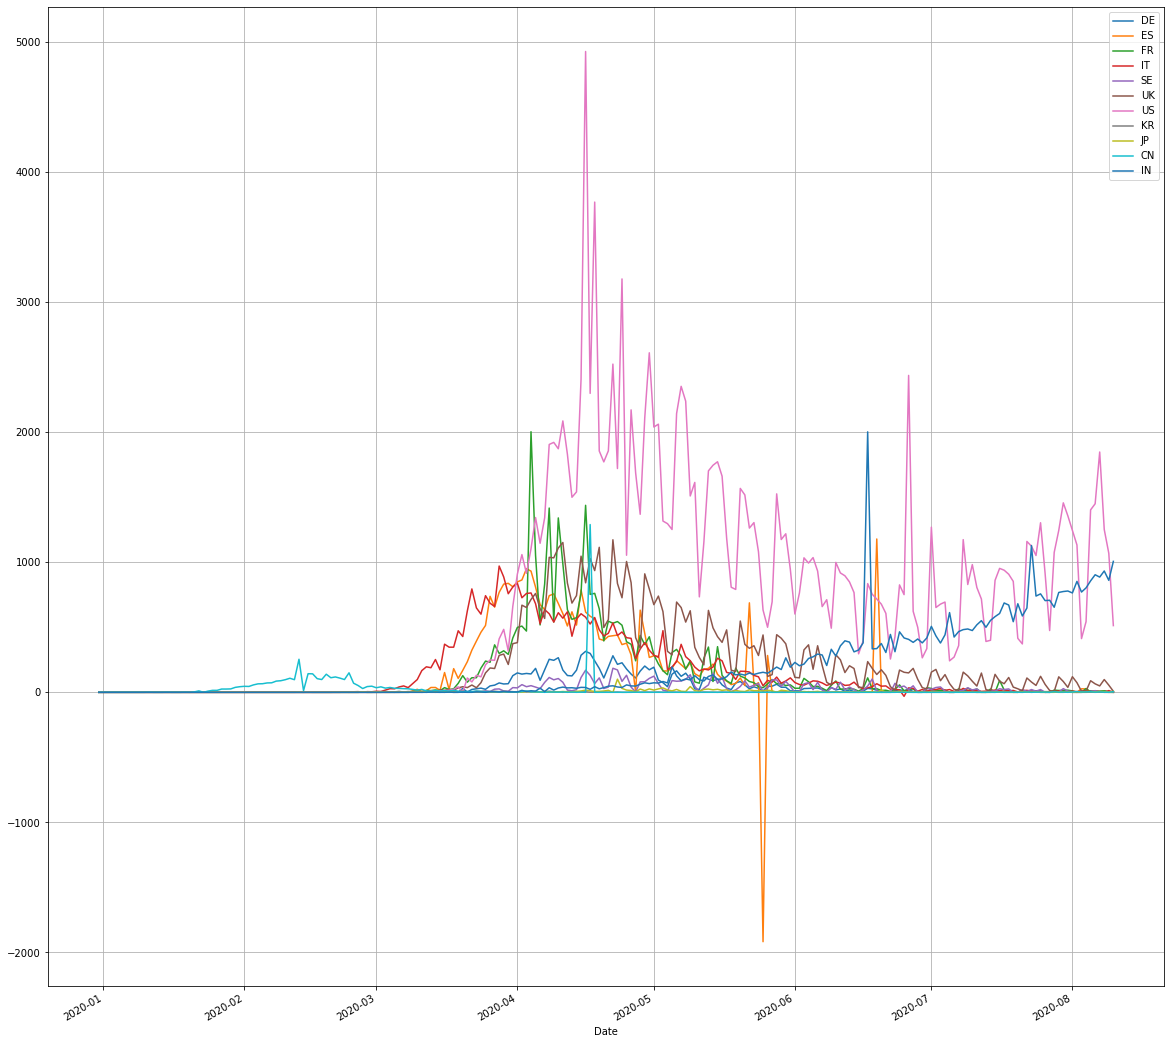

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

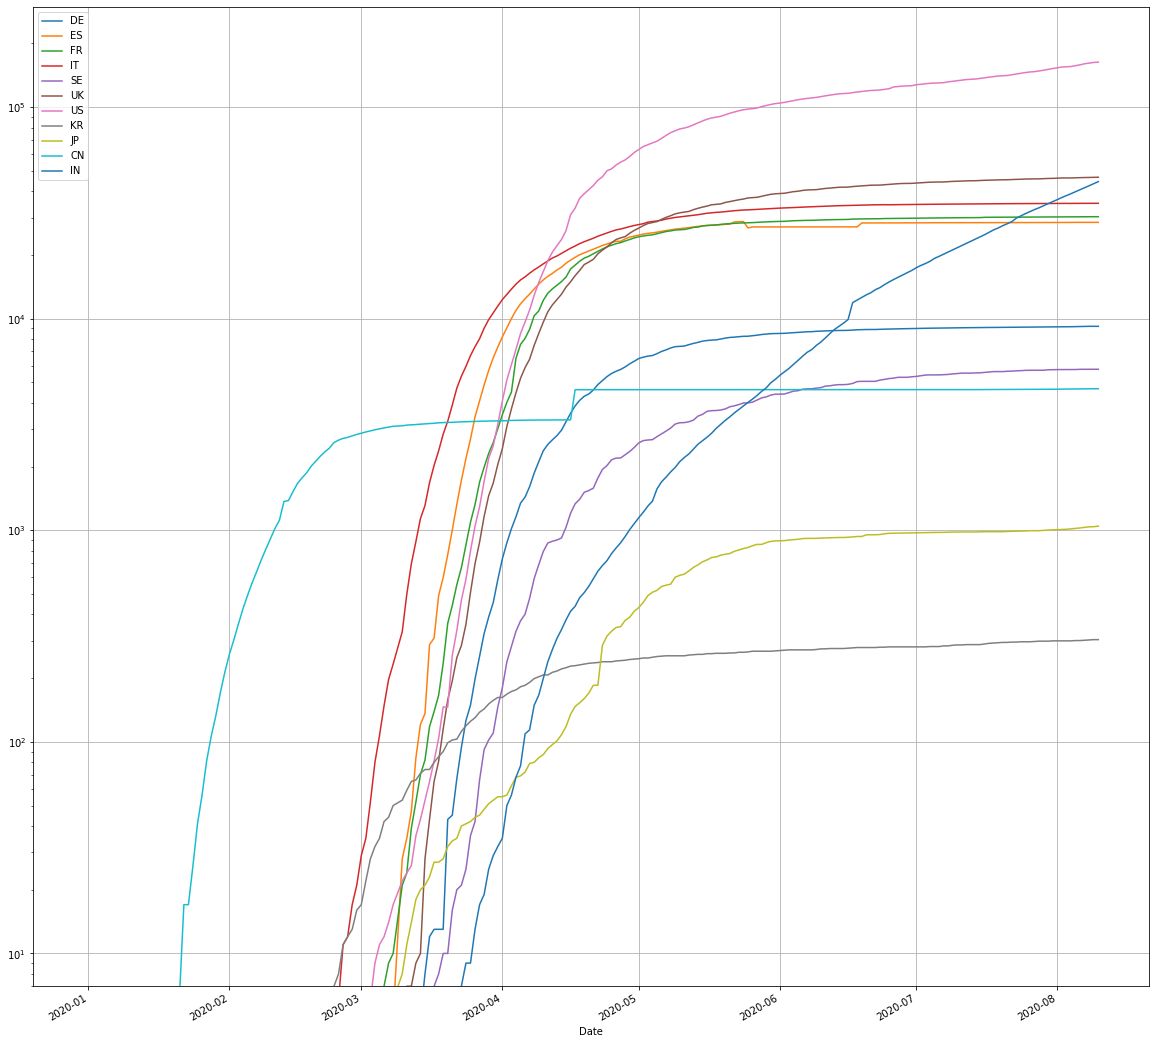

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-27,340.0,6361.0,0,254,0,421,55993,25,607,189,49931
12,2020-07-28,633.0,1828.0,2551,168,398,371,56243,28,0,213,47703
11,2020-07-29,684.0,2031.0,725,202,99,70,61734,48,1344,207,48513
10,2020-07-30,902.0,2789.0,1392,288,288,763,74985,18,1126,223,52123
9,2020-07-31,870.0,3092.0,1377,382,318,846,68032,36,1315,276,55078
8,2020-08-01,955.0,0.0,1346,379,322,880,67023,31,598,166,57118
7,2020-08-02,240.0,0.0,0,295,0,771,58407,0,1709,172,54735
6,2020-08-03,509.0,8532.0,0,238,0,743,47511,53,1991,158,52972
5,2020-08-04,879.0,5760.0,3376,159,590,928,45607,34,1786,114,52050
4,2020-08-05,741.0,2953.0,1039,190,169,670,57525,33,1271,107,52509


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-27,205554.0,278349.0,180118.0,244626.0,78955.0,300191.0,4233899.0,13927.0,29956.0,86525.0,1435453.0
2020-07-28,206187.0,280177.0,182669.0,244794.0,79353.0,300562.0,4290142.0,13955.0,29956.0,86738.0,1483156.0
2020-07-29,206871.0,282208.0,183394.0,244996.0,79452.0,300632.0,4351876.0,14003.0,31300.0,86945.0,1531669.0
2020-07-30,207773.0,284997.0,184786.0,245284.0,79740.0,301395.0,4426861.0,14021.0,32426.0,87168.0,1583792.0
2020-07-31,208643.0,288089.0,186163.0,245666.0,80058.0,302241.0,4494893.0,14057.0,33741.0,87444.0,1638870.0
2020-08-01,209598.0,288089.0,187509.0,246045.0,80380.0,303121.0,4561916.0,14088.0,34339.0,87610.0,1695988.0
2020-08-02,209838.0,288089.0,187509.0,246340.0,80380.0,303892.0,4620323.0,14088.0,36048.0,87782.0,1750723.0
2020-08-03,210347.0,296621.0,187509.0,246578.0,80380.0,304635.0,4667834.0,14141.0,38039.0,87940.0,1803695.0
2020-08-04,211226.0,302381.0,190885.0,246737.0,80970.0,305563.0,4713441.0,14175.0,39825.0,88054.0,1855745.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-27,0.0,2.0,0,5,0,14,475,1,0,0,708
12,2020-07-28,4.0,2.0,17,5,3,7,1076,1,0,4,654
11,2020-07-29,6.0,5.0,14,11,2,119,1245,0,4,1,768
10,2020-07-30,6.0,2.0,15,6,28,83,1457,0,3,2,775
9,2020-07-31,7.0,2.0,16,3,9,38,1357,1,2,0,779
8,2020-08-01,0.0,0.0,11,9,4,120,1244,0,1,2,764
7,2020-08-02,0.0,0.0,0,5,0,74,1133,0,4,6,853
6,2020-08-03,7.0,27.0,0,8,0,8,413,0,1,2,771
5,2020-08-04,8.0,26.0,29,12,1,9,543,0,5,3,803
4,2020-08-05,12.0,1.0,2,5,3,89,1403,1,6,4,857


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-27,9118.0,28434.0,30183.0,34974.0,5697.0,45752.0,146931.0,298.0,995.0,4629.0,32771.0
2020-07-28,9122.0,28436.0,30200.0,34979.0,5700.0,45759.0,148007.0,299.0,995.0,4633.0,33425.0
2020-07-29,9128.0,28441.0,30214.0,34990.0,5702.0,45878.0,149252.0,299.0,999.0,4634.0,34193.0
2020-07-30,9134.0,28443.0,30229.0,34996.0,5730.0,45961.0,150709.0,299.0,1002.0,4636.0,34968.0
2020-07-31,9141.0,28445.0,30245.0,34999.0,5739.0,45999.0,152066.0,300.0,1004.0,4636.0,35747.0
2020-08-01,9141.0,28445.0,30256.0,35008.0,5743.0,46119.0,153310.0,300.0,1005.0,4638.0,36511.0
2020-08-02,9141.0,28445.0,30256.0,35013.0,5743.0,46193.0,154443.0,300.0,1009.0,4644.0,37364.0
2020-08-03,9148.0,28472.0,30256.0,35021.0,5743.0,46201.0,154856.0,300.0,1010.0,4646.0,38135.0
2020-08-04,9156.0,28498.0,30285.0,35033.0,5744.0,46210.0,155399.0,300.0,1015.0,4649.0,38938.0
